<a href="https://colab.research.google.com/github/PhinehasBerko/Hello-world/blob/main/Building_State_of_the_art_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building State-of-the-art Classifier




In [1]:
# install and check for update in fastai library
!pip install fastai --upgrade -q

In [2]:
# import all modules from vision
from fastai.vision.all import *


In [3]:
#check if folder by name data exist else create a directory to store all our dataset
path = Path('Data_Store')
path.mkdir(exist_ok = True)

In [4]:
# get urls of images
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/bear.txt
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/dog.txt
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/horse.txt
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/monkey.txt
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/goat.txt


In [5]:

!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/cat.txt


In [6]:
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/cow.txt


In [7]:
# after getting image urls we have to download them using the download_images function
download_images('Data_Store/bear',Path('bear.txt'))
download_images('Data_Store/horse',Path('horse.txt'))
download_images('Data_Store/cat',Path('cat.txt'))
download_images('Data_Store/monkey',Path('monkey.txt'))
download_images('Data_Store/goat',Path('goat.txt'))
download_images('Data_Store/dog',Path('dog.txt'))

In [8]:
files = get_image_files(path)
len(files)

868

In [9]:
# checking if all the files are in correct format and store the corrupted in failed
failed = verify_images(files)
len(failed)
failed

(#67) [Path('Data_Store/cat/5aab54db-a157-4890-9570-4a114afeb055.jpg'),Path('Data_Store/cat/845e7592-42c5-486e-b0c5-43583ce5d7ca.jpg'),Path('Data_Store/cat/eed03386-42c2-4387-9ea7-2be1eea437d2.jpg'),Path('Data_Store/cat/b3cd7a81-1f8a-4e80-a271-3c1520755d15.jpg'),Path('Data_Store/cat/c4cfb01f-9bf2-4524-bcbb-94b61bd74de4.jpg'),Path('Data_Store/cat/a0b3d8d1-69a0-44ef-9193-5b1e2e8ec4ae.jpg'),Path('Data_Store/cat/7ea36a22-ecbe-42d3-92e4-a3774a7ba040.jpg'),Path('Data_Store/cat/b2ec7897-5523-4506-9c68-4fb699431d41.jpg'),Path('Data_Store/cat/ab046dab-8163-4663-b15b-b50007f74308.jpg'),Path('Data_Store/cat/01091cfd-3a41-45f4-a387-67670ed8289c.jpg')...]

In [10]:
# delete all the corrupted files
failed.map(Path.unlink)
files = get_image_files(path)

files

(#801) [Path('Data_Store/cat/c2d1c61d-7285-49c4-92fa-70bd3cdce984.jpg'),Path('Data_Store/cat/f7674315-a569-473a-9cf1-8707888856dc.jpg'),Path('Data_Store/cat/599725c2-21f4-4c77-b7cd-ce937fcbaa3a.png'),Path('Data_Store/cat/4b4d4174-4867-45fe-9db0-11ffd41f2f21.jpg'),Path('Data_Store/cat/e2a52f88-6f8e-4040-94ab-77ffb62e7b35.png'),Path('Data_Store/cat/d798f64e-38db-49ac-b3dc-81589ac0abc9.jpg'),Path('Data_Store/cat/e636e5c5-7347-49a7-9674-f336530172f8.jpg'),Path('Data_Store/cat/56458269-e6f6-4e3f-8a72-f5ad8c8776af.jpg'),Path('Data_Store/cat/b80ed2c6-719c-4fe4-9746-dc99aec3e06b.jpg'),Path('Data_Store/cat/3568f188-414f-455a-9e23-a4ac0df7a307.jpg')...]

### DataLoaders
DataLoader allow us to train models on large amount of data in batches.
To utilize this resources we have to tell fastai at least 4
basic stuff.
These are
1.  What kind of data we are work with
2.  How label is the items
3.   How to create valification set
4.  How to get the list of items

In [11]:
animals = DataBlock(
    blocks =(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed =25),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224,min_scale =0.5),
    batch_tfms = aug_transforms()
)

In [12]:
dls = animals.dataloaders(path)

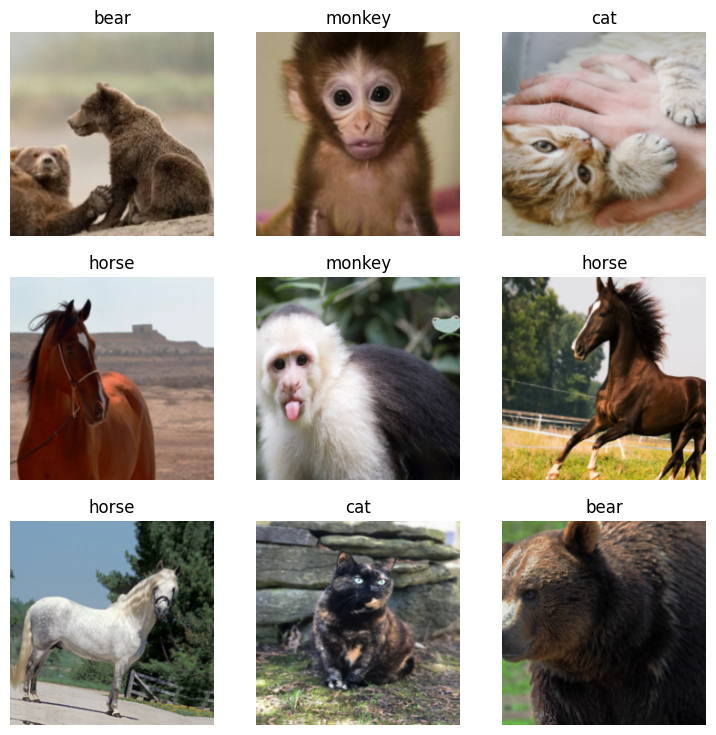

In [13]:
dls.train.show_batch()

## Learner

Fastai's learner class, put together everthing.
* DataLoaders
* Model Architecture
* Loss function and metric
* Training loop, callbacks and much more.

Then we can create a Learner, which is a fastai object that combines the data and a model for training,
 and uses transfer learning to fine tune a pretrained model.


In [14]:
learn = vision_learner(dls, resnet34, metrics = [error_rate,accuracy])
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 156MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.738530,0.277944,0.093750,0.906250,00:33


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.355062,0.163139,0.043750,0.956250,00:40
1,0.253191,0.180195,0.056250,0.943750,00:38
2,0.189764,0.168774,0.050000,0.950000,00:34


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


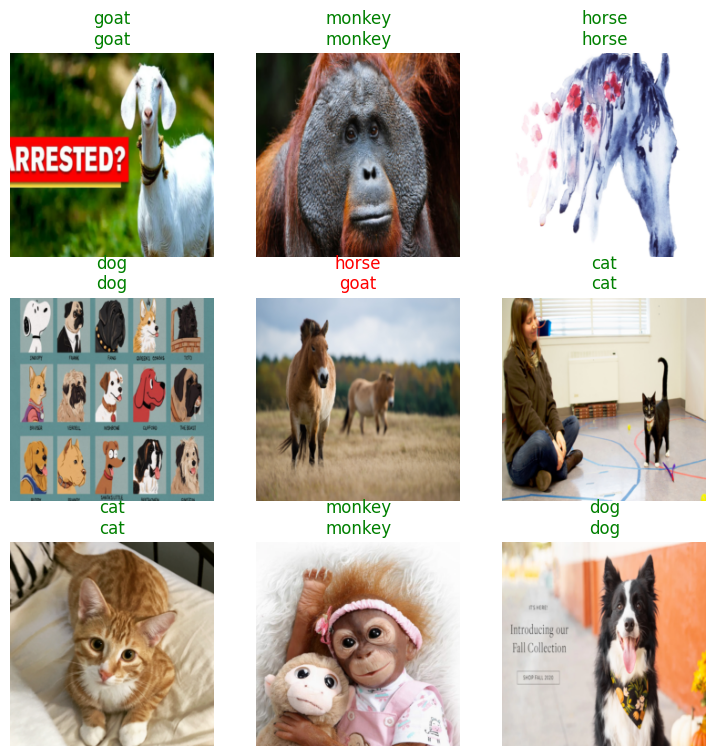

In [15]:
learn.show_results()

In [16]:
dls.vocab

['bear', 'cat', 'dog', 'goat', 'horse', 'monkey']

## Inference

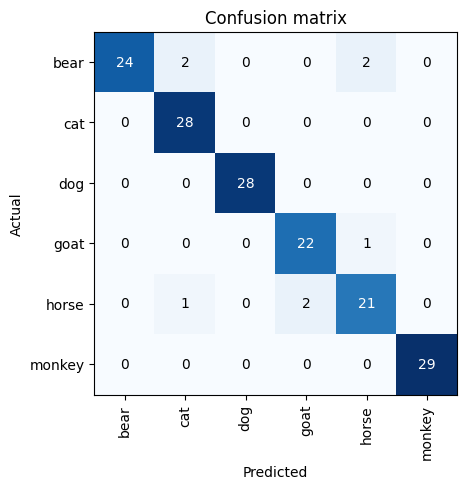

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

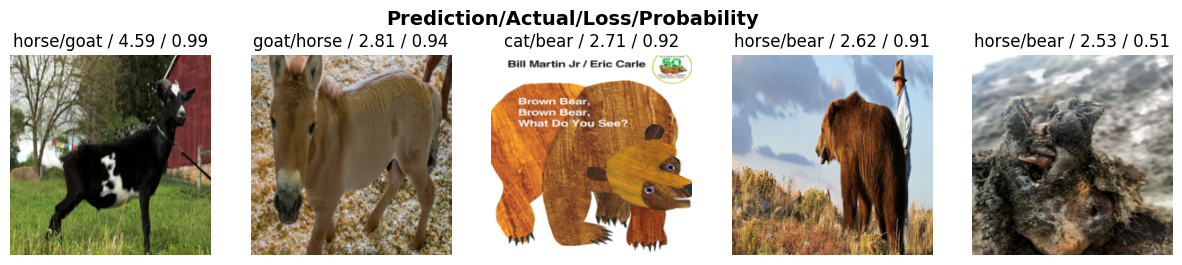

In [18]:
interp.plot_top_losses(5,nrows=1)

## Model Deployment



In [19]:
# First, we will export the model that we trained

learn.export ('export.pkl')

In [20]:
# Install Streamlit and colab-everything
!pip install streamlit
!pip install colab-everything

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.3 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=f76e4c7bfb6af1f25a4ccfe8708c14885ac139dfd631de896ded5380ba117956
  Stored

In [21]:
!wget -q https://raw.githubusercontent.com/Ankur-singh/CrowdSource-Workshop/main/app.py

In [22]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.30.65.117:8501

  Stopping...
^C


In [23]:
from colab_everything import ColabStreamlit
ColabStreamlit('app.py')

PyngrokNgrokHTTPError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')